# library1

In [1]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm

Using TensorFlow backend.


# train1

In [2]:
f = open(r"C:\Users\Manjith Reddy\Desktop\Test1\trainlist.txt")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
train_video = pd.DataFrame()
train_video['video_name'] = videos
train_video = train_video[:-1]
train_video.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c01.avi


# test1

In [3]:
f = open(r"C:\Users\Manjith Reddy\Desktop\Test1\testlist.txt")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
test_video = pd.DataFrame()
test_video['video_name'] = videos
test_video = test_video[:-1]
test_video.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g21_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g22_c01.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c01.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c01.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g25_c01.avi


# Tags for train and test videos

In [4]:
# creating tags for training videos
train_video_tag = []
for i in range(train_video.shape[0]):
    train_video_tag.append(train_video['video_name'][i].split('/')[0])
    
train_video['tag'] = train_video_tag

# creating tags for test videos
test_video_tag = []
for i in range(test_video.shape[0]):
    test_video_tag.append(test_video['video_name'][i].split('/')[0])
    
test_video['tag'] = test_video_tag

In [5]:
train_video.head()

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c01.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g03_c01.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c01.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c01.avi,ApplyEyeMakeup


In [6]:
test_video.head()

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g21_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g22_c01.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c01.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c01.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g25_c01.avi,ApplyEyeMakeup


In [7]:
train_video.shape

(359, 2)

# convertion of videos into frames

In [8]:
# storing the frames from training videos
for i in tqdm(range(train_video.shape[0])):
    count = 0
    videoFile = train_video['video_name'][i]
    Tagfile = train_video['tag'][i]
    cap = cv2.VideoCapture('C:\\Users\\Manjith Reddy\\Desktop\\Test1\\Data\\'+Tagfile+'\\'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames in a new folder named train_1
            filename ='C:\\Users\\Manjith Reddy\\Desktop\\Test1\\train_1\\'+ videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count
            count+=1
            cv2.imwrite(filename, frame)
    cap.release()

100%|██████████| 359/359 [00:35<00:00,  9.99it/s]


# List of images and classes

In [9]:
# getting the names of all the images
images = glob("train_1/*.jpg")
train_image = []
train_class = []
for i in tqdm(range(len(images))):
    # creating the image name
    train_image.append(images[i].split('\\')[1])
    # creating the class of image
    train_class.append(images[i].split('\\')[1].split('_')[1])
    
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

# converting the dataframe into csv file 
train_data.to_csv('train_new.csv',header=True, index=False)


100%|██████████| 2485/2485 [00:00<00:00, 621443.21it/s]


# Library 2

In [8]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [9]:
train = pd.read_csv('train_new.csv')
train.head()

,image,class
0,v_ApplyEyeMakeup_g01_c01.avi_frame0.jpg,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g01_c01.avi_frame1.jpg,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g01_c01.avi_frame2.jpg,ApplyEyeMakeup
3,v_ApplyEyeMakeup_g01_c01.avi_frame3.jpg,ApplyEyeMakeup
4,v_ApplyEyeMakeup_g01_c01.avi_frame4.jpg,ApplyEyeMakeup


In [10]:
# creating an empty list
train_image = []

# for loop to read and store frames
for i in tqdm(range(train.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    img = image.load_img('train_1/'+train['image'][i], target_size=(224,224,3))
    # converting it to array
    img = image.img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape

100%|██████████| 2485/2485 [00:18<00:00, 131.03it/s]


(2485, 224, 224, 3)

# creating a validation set

In [11]:
# separating the target
y = train['class']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [12]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Architecture of video classification model

In [13]:
# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

In [14]:
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape

(1988, 7, 7, 512)

In [15]:
# extracting features for validation frames
X_test = base_model.predict(X_test)
X_test.shape

(497, 7, 7, 512)

In [16]:
# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(1988, 7*7*512)
X_test = X_test.reshape(497, 7*7*512)

In [17]:
# normalizing the pixel values
max = X_train.max()
X_train = X_train/max
X_test = X_test/max

In [18]:
X_train.shape

(1988, 25088)

In [54]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Training the video classification model

In [55]:
# defining a function to save the weights of best model

mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [56]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [57]:
# training the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=128)

Train on 1988 samples, validate on 497 samples
Epoch 1/20
1988/1988 [==============================] - 8s 4ms/step - loss: 2.9343 - accuracy: 0.0830 - val_loss: 2.7764 - val_accuracy: 0.2334
Epoch 2/20
1988/1988 [==============================] - 8s 4ms/step - loss: 2.7093 - accuracy: 0.1519 - val_loss: 2.5409 - val_accuracy: 0.1871
Epoch 3/20
1988/1988 [==============================] - 8s 4ms/step - loss: 2.5487 - accuracy: 0.1901 - val_loss: 2.4141 - val_accuracy: 0.2636
Epoch 4/20
1988/1988 [==============================] - 8s 4ms/step - loss: 2.3807 - accuracy: 0.2430 - val_loss: 2.1699 - val_accuracy: 0.3058
Epoch 5/20
1988/1988 [==============================] - 8s 4ms/step - loss: 2.2188 - accuracy: 0.2726 - val_loss: 1.9793 - val_accuracy: 0.3763
Epoch 6/20
1988/1988 [==============================] - 7s 4ms/step - loss: 2.0285 - accuracy: 0.3390 - val_loss: 1.7465 - val_accuracy: 0.4527
Epoch 7/20
1988/1988 [==============================] - 8s 4ms/step - loss: 1.8420 - accu

# Evaluation of our classification Model

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.applications.vgg16 import VGG16
import cv2
import math
import os
from glob import glob
from scipy import stats as s

In [3]:
base_model = VGG16(weights='imagenet', include_top=False)

In [4]:
#defining the model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(25088,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

In [5]:
# loading the trained weights
model.load_weights('weight.hdf5')

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# creating test data

In [8]:
f = open(r"C:\Users\Manjith Reddy\Desktop\Test1\testlist.txt")
temp = f.read()
videos = temp.split('\n')

# creating a dataframe having video names
test_video = pd.DataFrame()
test_video['video_name'] = videos
test_video = test_video[:-1]
test_video.head()

,video_name
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g21_c01.avi
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g22_c01.avi
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c01.avi
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c01.avi
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g25_c01.avi


In [9]:
# creating tags for test videos
test_video_tag = []
for i in range(test_video.shape[0]):
    test_video_tag.append(test_video['video_name'][i].split('/')[0])
    
test_video['tag'] = test_video_tag

In [10]:
test_video.head()

,video_name,tag
0,ApplyEyeMakeup/v_ApplyEyeMakeup_g21_c01.avi,ApplyEyeMakeup
1,ApplyEyeMakeup/v_ApplyEyeMakeup_g22_c01.avi,ApplyEyeMakeup
2,ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c01.avi,ApplyEyeMakeup
3,ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c01.avi,ApplyEyeMakeup
4,ApplyEyeMakeup/v_ApplyEyeMakeup_g25_c01.avi,ApplyEyeMakeup


In [11]:
# creating the tags
train = pd.read_csv('train_new.csv')
y = train['class']
y = pd.get_dummies(y)

# Generating predictions for test videos

In [12]:
predict=[]
actual=[]
# for loop to extract frames from each test video
for i in tqdm(range(test_video.shape[0])):
    count = 0
    videoFile = test_video['video_name'][i]
    Tagfile = test_video['tag'][i]
    cap = cv2.VideoCapture('C:\\Users\\Manjith Reddy\\Desktop\\Test1\\Data\\'+Tagfile+'\\'+videoFile.split(' ')[0].split('/')[1])   # capturing the video from the given path
    frameRate = cap.get(5) #frame rate
    x=1
    # removing all other files from the temp folder
    files = glob('test_1/*')
    for f in files:
        os.remove(f)
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            # storing the frames of this particular video in temp folder
            filename ='C:\\Users\\Manjith Reddy\\Desktop\\Test1\\test_1\\'+ videoFile.split('/')[1].split(' ')[0] +"_frame%d.jpg" % count
            count+=1
            cv2.imwrite(filename, frame)
    cap.release()
    
    images = glob("test_1/*.jpg")
    
    prediction_images = []
    for i in range(len(images)):
        img = image.load_img(images[i], target_size=(224,224,3))
        img = image.img_to_array(img)
        img = img/255
        prediction_images.append(img)

    prediction_images = np.array(prediction_images)
    # extracting features using pre-trained model
    prediction_images = base_model.predict(prediction_images)
    # converting features in one dimensional array
    prediction_images = prediction_images.reshape(prediction_images.shape[0], 7*7*512)
    # predicting tags for each array
    prediction = model.predict_classes(prediction_images)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
    # appending the actual tag of the video
    actual.append(videoFile.split('/')[1].split('_')[1])

100%|██████████| 89/89 [03:16<00:00,  2.20s/it]


# Evaluating the model

In [13]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100

71.91011235955057

In [14]:
predict

['ApplyEyeMakeup',
 'BlowDryHair',
 'ApplyLipstick',
 'ApplyEyeMakeup',
 'ApplyLipstick',
 'ApplyLipstick',
 'ApplyLipstick',
 'ApplyLipstick',
 'ApplyLipstick',
 'ApplyLipstick',
 'BoxingPunchingBag',
 'BodyWeightSquats',
 'BandMarching',
 'BoxingSpeedBag',
 'Archery',
 'BabyCrawling',
 'BabyCrawling',
 'BabyCrawling',
 'BabyCrawling',
 'BabyCrawling',
 'BalanceBeam',
 'BalanceBeam',
 'Basketball',
 'BalanceBeam',
 'Basketball',
 'BandMarching',
 'BandMarching',
 'BandMarching',
 'BandMarching',
 'BandMarching',
 'Basketball',
 'BalanceBeam',
 'Basketball',
 'Basketball',
 'BaseballPitch',
 'Biking',
 'Biking',
 'Basketball',
 'Basketball',
 'Biking',
 'Archery',
 'BasketballDunk',
 'BasketballDunk',
 'BasketballDunk',
 'BasketballDunk',
 'BenchPress',
 'BenchPress',
 'BenchPress',
 'BenchPress',
 'BenchPress',
 'Biking',
 'Biking',
 'Biking',
 'Biking',
 'Biking',
 'Billiards',
 'Billiards',
 'Billiards',
 'Billiards',
 'Billiards',
 'BlowDryHair',
 'BlowDryHair',
 'BlowDryHair',
 'B

In [15]:
actual

['ApplyEyeMakeup',
 'ApplyEyeMakeup',
 'ApplyEyeMakeup',
 'ApplyEyeMakeup',
 'ApplyEyeMakeup',
 'ApplyLipstick',
 'ApplyLipstick',
 'ApplyLipstick',
 'ApplyLipstick',
 'ApplyLipstick',
 'Archery',
 'Archery',
 'Archery',
 'Archery',
 'Archery',
 'BabyCrawling',
 'BabyCrawling',
 'BabyCrawling',
 'BabyCrawling',
 'BabyCrawling',
 'BalanceBeam',
 'BalanceBeam',
 'BalanceBeam',
 'BalanceBeam',
 'BalanceBeam',
 'BandMarching',
 'BandMarching',
 'BandMarching',
 'BandMarching',
 'BandMarching',
 'BaseballPitch',
 'BaseballPitch',
 'BaseballPitch',
 'BaseballPitch',
 'BaseballPitch',
 'Basketball',
 'Basketball',
 'Basketball',
 'Basketball',
 'Basketball',
 'BasketballDunk',
 'BasketballDunk',
 'BasketballDunk',
 'BasketballDunk',
 'BasketballDunk',
 'BenchPress',
 'BenchPress',
 'BenchPress',
 'BenchPress',
 'BenchPress',
 'Biking',
 'Biking',
 'Biking',
 'Biking',
 'Biking',
 'Billiards',
 'Billiards',
 'Billiards',
 'Billiards',
 'Billiards',
 'BlowDryHair',
 'BlowDryHair',
 'BlowDryHair

In [16]:
from sklearn.metrics import plot_confusion_matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(actual,predict)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[2 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 3 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 2]]


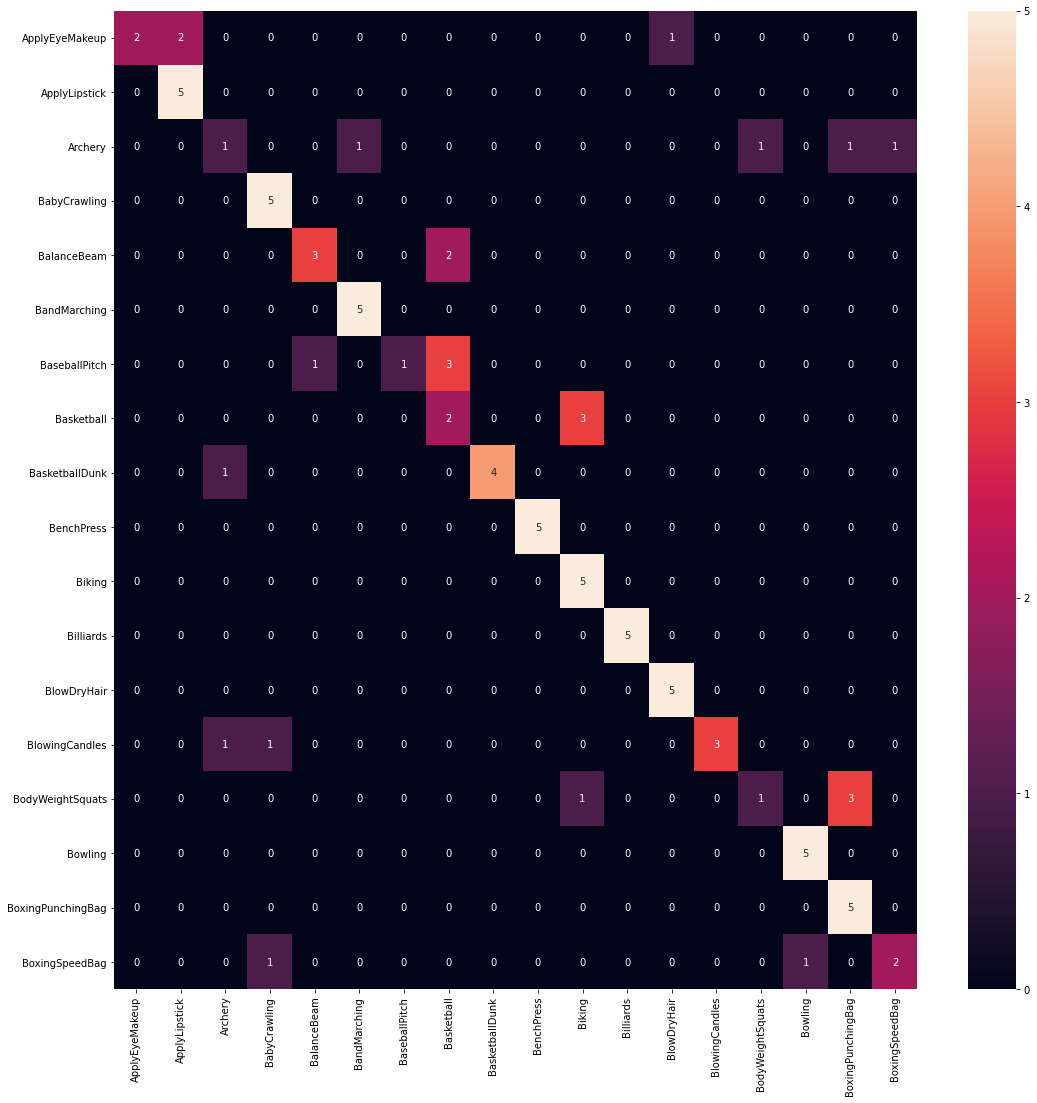

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
         [0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1],
         [0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,1,0,1,3,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0],
         [0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0],
         [0,0,1,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3,0],
         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0],
         [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2]]
df_cm = pd.DataFrame(array, index =['ApplyEyeMakeup','ApplyLipstick','Archery','BabyCrawling','BalanceBeam','BandMarching',
                                    'BaseballPitch','Basketball','BasketballDunk','BenchPress','Biking','Billiards','BlowDryHair',
                                    'BlowingCandles','BodyWeightSquats','Bowling','BoxingPunchingBag','BoxingSpeedBag'],
                  columns =['ApplyEyeMakeup','ApplyLipstick','Archery','BabyCrawling','BalanceBeam','BandMarching',
                                    'BaseballPitch','Basketball','BasketballDunk','BenchPress','Biking','Billiards','BlowDryHair',
                                    'BlowingCandles','BodyWeightSquats','Bowling','BoxingPunchingBag','BoxingSpeedBag'])
plt.figure(figsize = (18,18))
sn.heatmap(df_cm, annot=True)